# Rhythm analysis (global distribution)

Here we fit the global distribution of relative rhythmic bigrams to heavy-tailed distributions and assess goodness-of-fit using the bootstrap data in the `bootstrap` directory. 

In [1]:
import numpy as np
import pandas as pd
import powerlaw as pl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
from distributions import Lognormal, Exponential, Stretched_exponential, Positive_lognormal, Powerlaw_with_cutoff

In [3]:
rhythm_ranks = pd.read_csv('../data/rhythm_ranks.csv')['ranks']

## Power-law

In [4]:
fit = pl.Fit(rhythm_ranks, discrete=True)

Calculating best minimal value for power law fit
/Users/benlebrun/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/benlebrun/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [5]:
fit.xmin, fit.alpha, fit.D

(7.0, 2.5966830010114212, 0.02482771858584909)

In [6]:
# powerlaw bootstrap
powerlaw_boot = pd.read_csv('bootstrap/rhythm_bootstrap/rhythm_pl.csv')

In [7]:
Ds = powerlaw_boot['D']

In [8]:
print('p =', len(list(filter(lambda d: d>fit.D, Ds)))/1e3)

p = 0.0


Text(0.5, 1.0, 'Histogram of bootstrap KS distances')

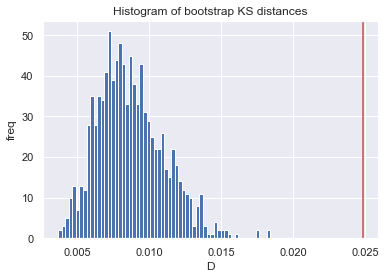

In [9]:
n = plt.hist(Ds, bins=60)
plt.axvline(x=fit.D, color='r')
plt.xlabel('D')
plt.ylabel('freq')
plt.title('Histogram of bootstrap KS distances')
#plt.savefig('rhythm_pl.png')

## Lognormal

In [10]:
ln_fit = Lognormal(rhythm_ranks)

/Users/benlebrun/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:1560: RuntimeWarning: invalid value encountered in true_divide
  return likelihoods/norm


In [11]:
ln_fit.xmin, ln_fit.sigma, ln_fit.mu, ln_fit.D

(10.0, 1.0479954337062993, 1.5865235416760273, 0.022035480113487438)

In [12]:
ln_boot = pd.read_csv('bootstrap/rhythm_bootstrap/rhythm_ln.csv')

In [13]:
Ds = ln_boot['D']

In [14]:
print('p =', len(list(filter(lambda d: d>ln_fit.D, Ds)))/1e3)

p = 0.002


Text(0, 0.5, 'freq')

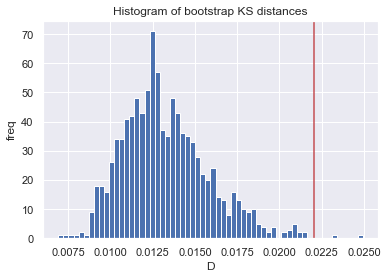

In [15]:
n = plt.hist(Ds, bins=60)
plt.axvline(x=ln_fit.D, color='r')
plt.xlabel('D')
plt.title('Histogram of bootstrap KS distances')
plt.ylabel('freq')
#plt.savefig('rhythm_ln.png')

## Exponential

In [16]:
exp_fit = Exponential(rhythm_ranks)

In [17]:
exp_fit.xmin, exp_fit.Lambda, exp_fit.D

(27.0, 0.05501348858737702, 0.019370915793065047)

In [18]:
exp_boot = pd.read_csv('bootstrap/rhythm_bootstrap/rhythm_exp.csv')

Text(0, 0.5, 'freq')

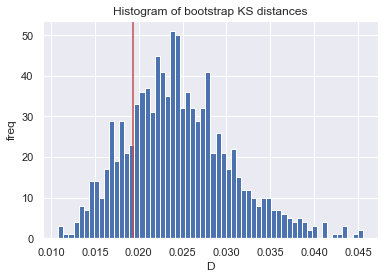

In [19]:
n = plt.hist(exp_boot['D'], bins=60)
plt.axvline(x=exp_fit.D, color='r')
plt.xlabel('D')
plt.title('Histogram of bootstrap KS distances')
plt.ylabel('freq')
#plt.savefig('rhythm_exp.png')

In [20]:
print('p =', len(list(filter(lambda d: d>exp_fit.D, exp_boot['D'])))/1e3)

p = 0.809


### Stretched exponential

In [21]:
str_exp_fit = Stretched_exponential(rhythm_ranks)

In [22]:
str_exp_fit.xmin, str_exp_fit.Lambda, str_exp_fit.beta, exp_fit.D

(31.0, 0.03249199356916668, 1.4041128758404728, 0.019370915793065047)

In [23]:
str_exp_boot = pd.read_csv('bootstrap/rhythm_bootstrap/rhythm_str_exp.csv')

Text(0, 0.5, 'freq')

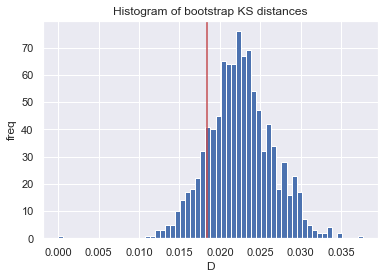

In [24]:
n = plt.hist(str_exp_boot['D'], bins=60)
plt.axvline(x=str_exp_fit.D, color='r')
plt.xlabel('D')
plt.title('Histogram of bootstrap KS distances')
plt.ylabel('freq')
#plt.savefig('rhythm_str_exp.png')

In [25]:
print('p =', len(list(filter(lambda d: d>str_exp_fit.D, str_exp_boot['D'])))/1e3)

p = 0.857


### Positive lognormal

In [26]:
pos_ln_fit = Positive_lognormal(rhythm_ranks)

In [27]:
pos_ln_boot = pd.read_csv('bootstrap/rhythm_bootstrap/rhythm_pln.csv')

In [28]:
pos_ln_fit.xmin

10.0

Text(0.5, 1.0, 'Histogram of bootstrap KS distances')

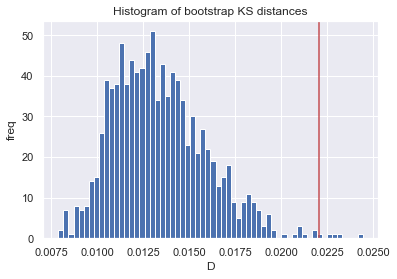

In [29]:
n = plt.hist(pos_ln_boot['D'], bins=60)
plt.axvline(x=pos_ln_fit.D, color='r')
plt.xlabel('D')
plt.ylabel('freq')
plt.title('Histogram of bootstrap KS distances')
#plt.savefig('rhythm_pln.png')

In [30]:
print('p =', len(list(filter(lambda d: d>pos_ln_fit.D, pos_ln_boot['D'])))/1e3)

p = 0.004


### Powerlaw with exponential cutoff

In [31]:
cutoff_fit = Powerlaw_with_cutoff(rhythm_ranks)

In [32]:
cutoff_fit.xmin

22.0

In [38]:
cutoff = pd.read_csv('bootstrap/rhythm_bootstrap/rhythm_pl_cut_off.csv')

Text(0.5, 1.0, 'Histogram of bootstrap KS distances')

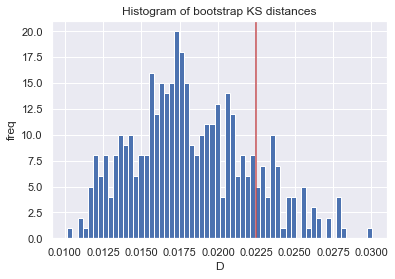

In [39]:
n = plt.hist(cutoff['D'], bins=60)
plt.axvline(x=cutoff_fit.D, color='r')
plt.xlabel('D')
plt.ylabel('freq')
plt.title('Histogram of bootstrap KS distances')
#plt.savefig('rhythm_pl_cutoff.png')

In [40]:
print('p =', len(list(filter(lambda d: d>cutoff_fit.D, cutoff['D'])))/len(cutoff['D']))

p = 0.15
